In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['legend.fontsize'] = 16

In [3]:
fdir = 'NFM1/planarity/'
fname = 'plan.txt'

fpath = fdir + fname


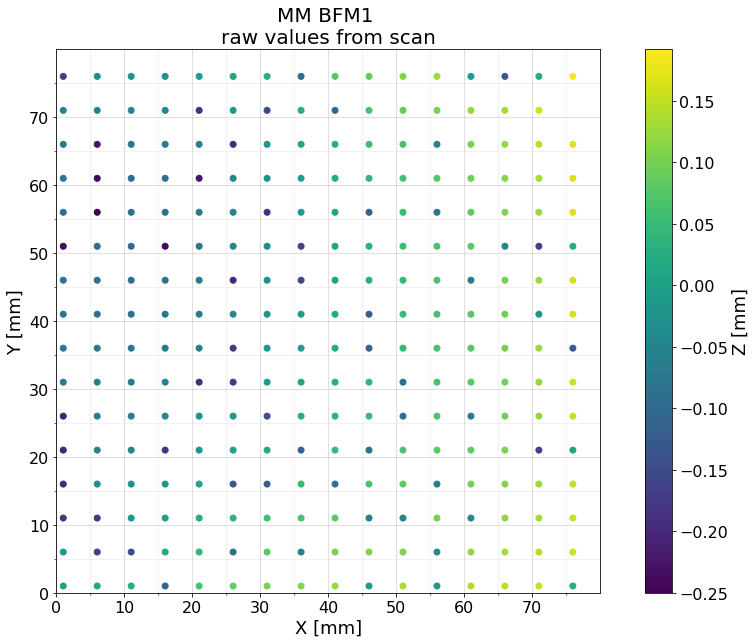

In [19]:
# Initialize lists to store X, Y, Z coordinates
X = []
Y = []
Z = []

# Flag to indicate if we've encountered Point-2
found_point_2 = False

with open(fpath, 'r', encoding='ISO-8859-1') as f:
    for line in f:

        # Check if the line contains Point-2
        if "Point-2" in line:
            found_point_2 = True
            continue  # Move to the next line

        # If Point-2 has been found, parse and extract coordinates
        if found_point_2:
            # Extract X, Y, Z coordinates from the line
            if "Coord. X" in line:
                x = float(line.split("=")[-1].strip().replace(',', '.'))
            elif "Coord. Y" in line:
                y = float(line.split("=")[-1].strip().replace(',', '.'))
            elif "Coord. Z" in line:
                z = float(line.split("=")[-1].strip().replace(',', '.'))
                
                # Append coordinates to respective lists
                X.append(x+1)
                Y.append(y+1)
                Z.append(z)

# Create a DataFrame from the extracted coordinates
df = pd.DataFrame({'X': X, 'Y': Y, 'Z': Z})

fig, ax = plt.subplots(figsize=(16, 10)) 

plt.scatter(df['X'], df['Y'], c=df['Z'], cmap='viridis')
plt.colorbar(label='Z [mm]')
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
plt.title('MM BFM1 \nraw values from scan')

major_ticks = np.arange(0, 80, 10)
minor_ticks = np.arange(0, 80, 5)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
ax.set_aspect('equal')


plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

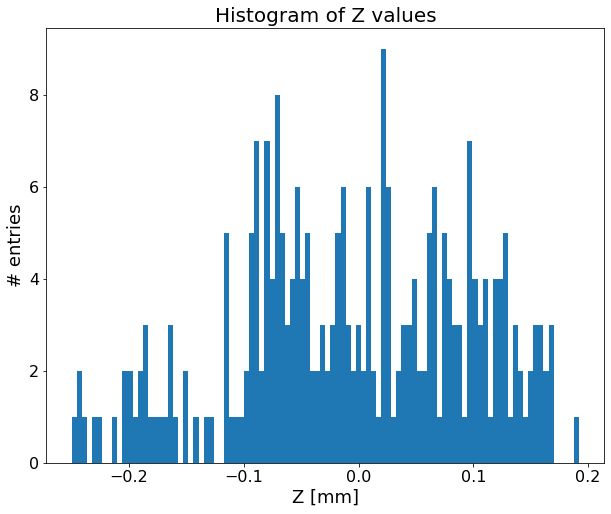

In [30]:
fig, ax = plt.subplots(figsize=(10, 8)) 
plt.hist(df['Z'], bins=100)
plt.xlabel('Z [mm]')
plt.ylabel('# entries')
plt.title('Histogram of Z values')
plt.show()

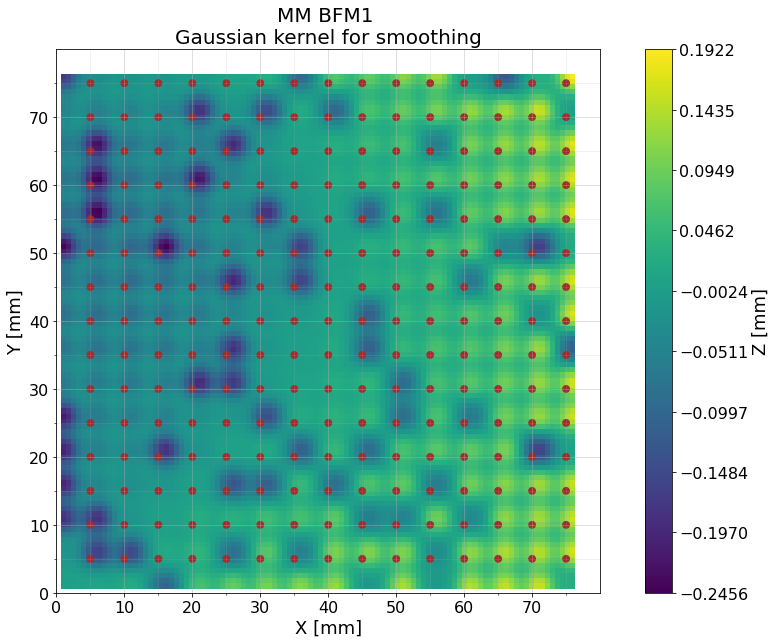

In [18]:
# Create a grid for the heatmap
x_grid = np.linspace(df['X'].min(), df['X'].max(), 100)
y_grid = np.linspace(df['Y'].min(), df['Y'].max(), 100)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)

# ç
Z_grid = np.zeros_like(X_grid)
for i, row in df.iterrows():
    x, y, z = row['X'], row['Y'], row['Z']
    Z_grid += (np.exp(-((X_grid - x)**2 + (Y_grid - y)**2) / 5) * z)  # Gaussian kernel for smoothing

# Create the heatmap
fig, ax = plt.subplots(figsize=(16, 10)) 
heatmap = plt.pcolormesh(X_grid, Y_grid, Z_grid, cmap='viridis')
colorbar = plt.colorbar(heatmap, label='Z [mm]', ticks=np.linspace(Z_grid.min(), Z_grid.max(), num=10))

plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
plt.title('MM BFM1 \nGaussian kernel for smoothing')

major_ticks = np.arange(0, 80, 10)
minor_ticks = np.arange(0, 80, 5)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
ax.set_aspect('equal')

for x in range (5,80, 5):
    for y in range (5,80, 5):
        
        circle=plt.Circle((x,y),0.5, color='brown')
        
        ax.add_patch(circle)

plt.xlim(0,80)
plt.ylim(0,80)
plt.show()
